## If you are not viewing this notebook in Colab already, open this link:

https://colab.research.google.com/github/dbamman/anlp25/blob/main/0.setup/Colab_Intro.ipynb

# What is Colab?

* Colab is a free [Jupyter Notebook](https://jupyter.org/)
environment hosted by Google that allows you to develop and run code and analyze data using computing resources in the cloud.  In this class, we'll typically use it for programming assignments in Python.


* Colab Notebooks (like this one) consist of "Cells" that help organize code and text. From within Colab, you can add a Code Cell or a Text Cell by clicking the "+ Code" or "+ Text" buttons on the top left.


* Google provides lots more details and tips about Colab in their [tutorials](https://colab.research.google.com/notebooks/welcome.ipynb).  If you are new to Colab, you might find these tutorials helpful to get up to speed.


* To execute the code in a cell, use the key-command `shift+enter`. Try that out on the code cell below
    * Note: the first time you try this, Colab might warn you that **"This notebook was not authored by Google."** This is okay, just accept the warning and continue.

In [ ]:
5 + 5

# Creating a Colab Notebook

* You need to be signed into a Google account in order to create, edit, and save Colab Notebooks.  You can create a new Notebook and find your saved Notebooks by going to https://colab.research.google.com/ while logged into your Google account.


* We recommend that you use your Berkeley Gmail account rather than a personal Gmail for this class in order to avoid confusion.  When viewing a notebook, you can make sure that you're using the right Gmail account by clicking on your profile icon at the top right, and switch accounts if necessary.


* Saved notebooks will then be stored in your account on Google Drive.  

# Viewing a Colab hosted on Github

* In addition to Google Drive, Colab Notebooks can also be opened in the browser if they are stored on Github. For this class, assignments or examples will be posted on the course Github. Jupyter Notebooks are files with the extension ".ipynb".


* If a Jupyter Notebook is posted on Github, you can open it in Colab by copying the web address address of the '.ipynb' file and pointing your browser to `https://colab.research.google.com/github/{github-path-to-notebook}`


* For example, this notebook can be opened in Colab via `https://colab.research.google.com/github/dbamman/anlp25/blob/main/0.setup/Colab_Intro.ipynb`



# Making and saving changes




* Once you've opened a Notebook in Colab, you can run the code and make edits. To save your changes, click on File->Save in the menu.

* **If you are editing a copy of a Colab that you opened from Github, your edits will only be saved once you save a copy in your Google Drive.** To do this, click on File->Save a copy in Drive.
  * By default, this should save the notebook into `My Drive/Colab Notebooks` on your Google Drive. You can find the exact location of your notebook (and move it, if you'd like) by clicking on File->Locate in Drive.

* In order to get started on an assigment, you'll want to open the starter notebook from Github in Colab and then save a copy into your Google Drive so that you can make changes to complete the assignment.

# What is a Runtime?

* Each time you open a Notebook in Colab, you are actually connecting to a computer (a server running the Linux operating system) in the Cloud, hosted by Google. When you execute your code, it's actually running on that computer and sending back any results to display in your browser.  In Colab, this connection between a Google server and your browser is called a 'Runtime'.


* Because Google provides these servers free to Colab users, running code on Colab lets you take advantage of powerful hardware to run computations faster than you could on a laptop, for example.


* Because you need to connect to a "Runtime" in order to use Colab, each time you connect, you'll need to re-run setup code each time you re-connect (such as installing Python libraries or downloading data). This can take a few minutes, but it's a necessary trade-off in order to be able to use these free computational resources.

# Downloading Data

* To work with data in Colab, we need to download the data to the computer you're connecting to in your Runtime. Data can be downloaded using the `!wget` command or by connecting to files on Google Drive.


* When possible, data for course assignments will be uploaded to the course Github and then can be downloaded from within Colab. Make sure to download the 'raw' content of the file.

In [ ]:
!wget --no-check-certificate https://raw.githubusercontent.com/dbamman/anlp25/master/0.setup/example_data.txt
!ls

* Let's open a file from the course Github using Python and print out the contents.

In [ ]:
open('example_data.txt').read().split('\n')

* You can also see the `example_data.txt` in your file explorer on the left sidebar.

  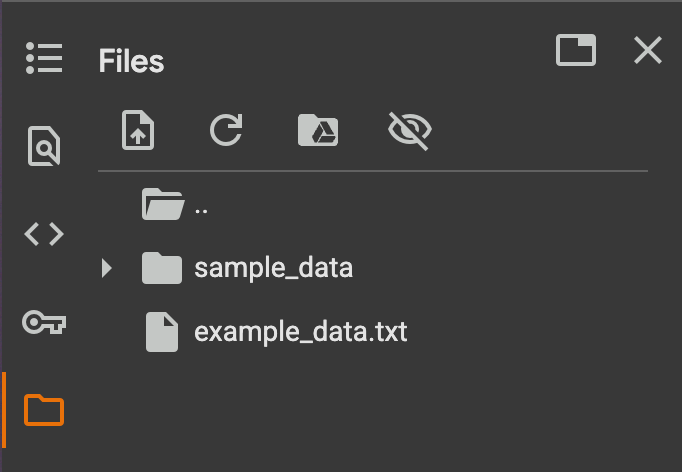

# Enabling GPU



* For some assignments in this class, you will want to enable Colab's GPU, which allows neural models to train much faster (~20x!) than on a CPU.


* GPU is not enabled by default on Colab.  To do so, perform the following:
    
    * Go to Runtime -> Change runtime type.

    * Under "Hardware Accelerator", select one of the "GPU" options (e.g., "T4 GPU")


* In order to confirm GPU is enabled, run the following command in your Colab notebook:

In [ ]:
import torch
print(torch.cuda.is_available())

If the cell returns `True`, it means GPU is enabled. If it returns `False`, it means the GPU is not enabled.

Let's see the difference in runtime when we do a matrix multiplication on the CPU compared to the GPU.

In [ ]:
%%timeit

# By default, pytorch uses the CPU.
mat_a = torch.rand((1024, 1024))
mat_b = torch.rand((1024, 8192))

torch.matmul(mat_a, mat_b)

In [ ]:
%%timeit

# By setting the device to `cuda`, we are doing these computations on the GPU.
mat_a = torch.rand((1024, 1024), device="cuda")
mat_b = torch.rand((1024, 8192), device="cuda")

torch.matmul(mat_a, mat_b)